<a href="https://colab.research.google.com/github/NIlesh-Thamke/Machine-Learning-Practicals/blob/main/ML_Pract5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [19]:
data = pd.read_csv('/content/Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [20]:
X = data[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

# Scaling the features to standardize them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
sse = []
for k in range(1, 11):  # Test cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)


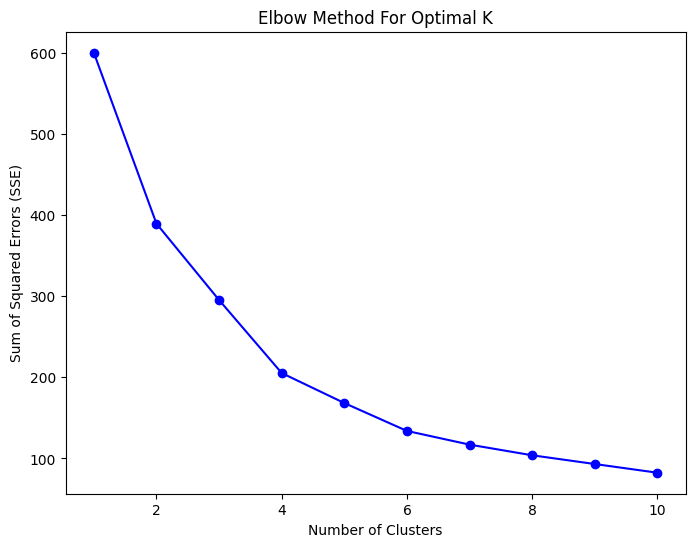

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

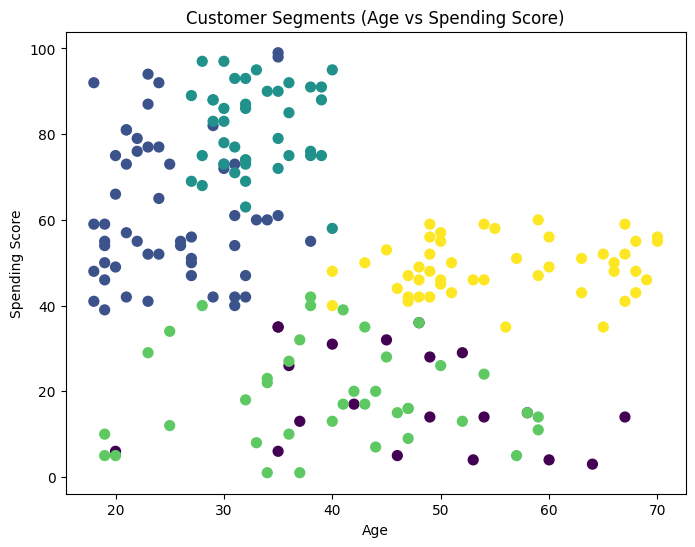

In [27]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
# The variable X_scaled contains the scaled data
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
# Use the original dataframe 'data' instead of 'df'
data['Cluster'] = y_kmeans

# Visualize the clusters using the first two features
# Assuming 'Age' and 'Spending Score' are features in your data
# If not, replace them with the actual feature names
plt.figure(figsize=(8,6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments (Age vs Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()